<a href="https://colab.research.google.com/github/melikaminari/DataJournalism/blob/main/2022_text_analysis_newsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
import datetime


In [138]:
!python -m spacy download el_core_news_sm

2023-07-14 18:04:50.505501: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.5.0/el_core_news_sm-3.5.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [139]:
newsit_full_articles_df = pd.read_csv('/content/content/MyDrive/2o scraper.ipynb_csv')
newsit_full_articles_df

site  \
0    https://www.newsit.gr/   
1    https://www.newsit.gr/   
2    https://www.newsit.gr/   
3    https://www.newsit.gr/   
4    https://www.newsit.gr/   
..                      ...   
115  https://www.newsit.gr/   
116  https://www.newsit.gr/   
117  https://www.newsit.gr/   
118  https://www.newsit.gr/   
119  https://www.newsit.gr/   

                                                   url  \
0    https://www.newsit.gr/megales-epixeiriseis/Mag...   
1    https://www.newsit.gr/ellada/kikilias-o-touris...   
2    https://www.newsit.gr/topikes-eidhseis/kyklade...   
3    https://www.newsit.gr/megales-epixeiriseis/nea...   
4    https://www.newsit.gr/topikes-eidhseis/tourism...   
..                                                 ...   
115  https://www.newsit.gr/oikonomia/EBRD-anaptyksi...   
116  https://www.newsit.gr/politikh/vasilis-kikilia...   
117  https://www.newsit.gr/oikonomia/i-ellada-koryf...   
118  https://www.newsit.gr/kosmos/nisi-tou-pasxa-ox...   
119  https://www.newsit.gr/ellada/sxedon-80-ayksith...   

                                               section  \
0    \nNewsIT Μεγαλες Επιχειρησεις Magma Resort: Ντ...   
1    \nNewsIT Ελλαδα Κικιλιας: Ο τουρισμος στην Αθη...   
2    \nNewsIT Τοπικα Νεα Κυκλαδες: Αυτο ειναι το νη...   
3    \nNewsIT Μεγαλες Επιχειρησεις Νεα τουριστικη ε...   
4    \nNewsIT Τοπικα Νεα Τουρισμος: Αλλαγες στο προ...   
..                                                 ...   
115  \nNewsIT Οικονομια EBRD: Αναπτυξη 7% της ελλην...   
116  \nNewsIT Πολιτικη Βασιλης Κικιλιας για τουρισμ...   
117  \nNewsIT Οικονομια Η Ελλαδα κορυφαιος τουριστι...   
118  \nNewsIT Κοσμος Νησι του Πασχα: «Οχι» στο ανοι...   
119  \nNewsIT Ελλαδα Σχεδον 80% αυξηθηκαν φετος σε ...   

                                                 title  \
0    Magma Resort: Ντεμπούτο στα ελληνικά νησιά από...   
1    Κικίλιας: Ο τουρισμός στην Αθήνα φέρνει ρεκόρ ...   
2    Κυκλάδες: Αυτό είναι το νησί που μπήκε στη λίσ...   
3    Νέα τουριστική επένδυση: Ξενοδοχείο στα Χανιά ...   
4    Τουρισμός: Αλλαγές στο προφίλ των επισκεπτών σ...   
..                                                 ...   
115  EBRD: Ανάπτυξη 7% της ελληνικής οικονομίας φέτ...   
116  Βασίλης Κικίλιας για τουρισμό στο sky news: Τώ...   
117  Η Ελλάδα κορυφαίος τουριστικός προορισμός για ...   
118  Νησί του Πάσχα: «Όχι» στο άνοιγμα του τουρισμο...   
119  Σχεδόν 80% αυξήθηκαν φέτος σε σχέση με το 2020...   

                          date  author  \
0    2022-08-31T14:26:54+03:00     NaN   
1    2022-08-31T11:48:30+03:00     NaN   
2    2022-08-29T11:23:39+03:00     NaN   
3    2022-08-26T15:30:00+03:00     NaN   
4    2022-08-26T11:34:08+03:00     NaN   
..                         ...     ...   
115  2021-11-04T13:21:57+02:00     NaN   
116  2021-11-03T18:41:53+02:00     NaN   
117  2021-10-25T11:30:00+03:00     NaN   
118  2021-10-25T09:35:26+03:00     NaN   
119  2021-10-22T15:29:13+03:00     NaN   

                                             full_text  \
0    Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...   
1    «Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ...   
2    Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και...   
3    Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο...   
4    Αλλαγές στο προφίλ των τουριστών που επισκέπτο...   
..                                                 ...   
115  Αισιόδοξη πρόβλεψη από την EBRD (Ευρωπαϊκή Τρά...   
116  Με σκληρή δουλειά τώρα, αναμένουμε την ολική ε...   
117  Ως ο κορυφαίος προορισμός για την Ευρώπη το 20...   
118  Το νησί του Πάσχα θα παραμείνει κλειστό προς τ...   
119  Αύξηση προσέλευσης της τάξεως του 79,3% σε σχέ...   

                      datetime  
0    2022-08-31 14:26:54+03:00  
1    2022-08-31 11:48:30+03:00  
2    2022-08-29 11:23:39+03:00  
3    2022-08-26 15:30:00+03:00  
4    2022-08-26 11:34:08+03:00  
..                         ...  
115  2021-11-04 13:21:57+02:00  
116  2021-11-03 18:41:53+02:00  
117  2021-10-25 11:30:00+03:00  
118  2021-10-25 09:35:26+03

In [140]:
print(datetime)

<module 'datetime' from '/usr/lib/python3.10/datetime.py'>


In [141]:
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], utc=True, format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

site                                                url  \
0  https://www.newsit.gr/  https://www.newsit.gr/megales-epixeiriseis/Mag...   
1  https://www.newsit.gr/  https://www.newsit.gr/ellada/kikilias-o-touris...   
2  https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/kyklade...   
3  https://www.newsit.gr/  https://www.newsit.gr/megales-epixeiriseis/nea...   
4  https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/tourism...   

                                             section  \
0  \nNewsIT Μεγαλες Επιχειρησεις Magma Resort: Ντ...   
1  \nNewsIT Ελλαδα Κικιλιας: Ο τουρισμος στην Αθη...   
2  \nNewsIT Τοπικα Νεα Κυκλαδες: Αυτο ειναι το νη...   
3  \nNewsIT Μεγαλες Επιχειρησεις Νεα τουριστικη ε...   
4  \nNewsIT Τοπικα Νεα Τουρισμος: Αλλαγες στο προ...   

                                               title  \
0  Magma Resort: Ντεμπούτο στα ελληνικά νησιά από...   
1  Κικίλιας: Ο τουρισμός στην Αθήνα φέρνει ρεκόρ ...   
2  Κυκλάδες: Αυτό είναι το νησί που μπήκε στη λίσ...   
3  Νέα τουριστική επένδυση: Ξενοδοχείο στα Χανιά ...   
4  Τουρισμός: Αλλαγές στο προφίλ των επισκεπτών σ...   

                        date  author  \
0  2022-08-31T14:26:54+03:00     NaN   
1  2022-08-31T11:48:30+03:00     NaN   
2  2022-08-29T11:23:39+03:00     NaN   
3  2022-08-26T15:30:00+03:00     NaN   
4  2022-08-26T11:34:08+03:00     NaN   

                                           full_text                  datetime  
0  Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε... 2022-08-31 11:26:54+00:00  
1  «Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ... 2022-08-31 08:48:30+00:00  
2  Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και... 2022-08-29 08:23:39+00:00  
3  Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο... 2022-08-26 12:30:00+00:00  
4  Αλλαγές στο προφίλ των τουριστών που επισκέπτο... 2022-08-26 08:34:08+00:00

In [142]:
newsit_full_articles_df.loc[0, 'date']

'2022-08-31T14:26:54+03:00'

In [143]:
original_datetime = "2023-07-09T13:20:41+03:00"
datetime = original_datetime.replace('T','').replace('+03', '').replace(':00', '')

In [144]:
newsit_short_df = newsit_full_articles_df[['datetime','full_text']]
newsit_short_df.head()

datetime                                          full_text
0 2022-08-31 11:26:54+00:00  Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...
1 2022-08-31 08:48:30+00:00  «Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ...
2 2022-08-29 08:23:39+00:00  Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και...
3 2022-08-26 12:30:00+00:00  Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο...
4 2022-08-26 08:34:08+00:00  Αλλαγές στο προφίλ των τουριστών που επισκέπτο...

In [145]:
newsit_short_df['year'] = pd.DatetimeIndex(newsit_short_df['datetime']).year
newsit_short_df['month'] = pd.DatetimeIndex(newsit_short_df['datetime']).month
newsit_short_df['day'] = pd.DatetimeIndex(newsit_short_df['datetime']).day
newsit_short_df['hour'] = pd.DatetimeIndex(newsit_short_df['datetime']).hour

<ipython-input-145-482f2c980068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsit_short_df['year'] = pd.DatetimeIndex(newsit_short_df['datetime']).year
<ipython-input-145-482f2c980068>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsit_short_df['month'] = pd.DatetimeIndex(newsit_short_df['datetime']).month
<ipython-input-145-482f2c980068>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [146]:
newsit_short_df.head()

datetime  \
0 2022-08-31 11:26:54+00:00   
1 2022-08-31 08:48:30+00:00   
2 2022-08-29 08:23:39+00:00   
3 2022-08-26 12:30:00+00:00   
4 2022-08-26 08:34:08+00:00   

                                           full_text  year  month  day  hour  
0  Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...  2022      8   31    11  
1  «Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ...  2022      8   31     8  
2  Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και...  2022      8   29     8  
3  Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο...  2022      8   26    12  
4  Αλλαγές στο προφίλ των τουριστών που επισκέπτο...  2022      8   26     8

<Axes: >

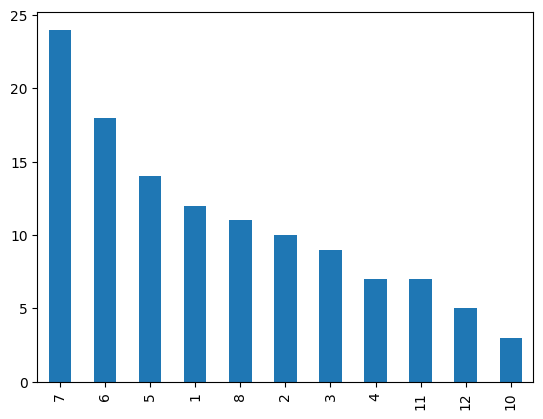

In [147]:
newsit_short_df['month'].value_counts().plot(kind='bar')

<Axes: >

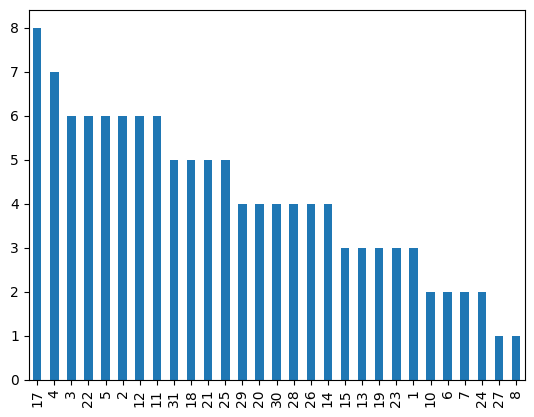

In [148]:
newsit_short_df['day'].value_counts().plot(kind='bar')

In [149]:
newsit_short_df.groupby('day')['full_text'].count().sort_values(ascending=False)

day
17    8
4     7
2     6
3     6
5     6
22    6
11    6
12    6
25    5
21    5
18    5
31    5
14    4
30    4
29    4
28    4
20    4
26    4
15    3
23    3
19    3
13    3
1     3
7     2
24    2
6     2
10    2
8     1
27    1
Name: full_text, dtype: int64

In [150]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [151]:
text = newsit_short_df['full_text'].str.cat(sep = ' ')

In [152]:
nlp = spacy.load('el_core_news_sm')

In [153]:
full_doc = nlp(text)

In [154]:
full_doc[:200]

Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνει η αμερικανική πολυεθνική εταιρεία φιλοξενίας Hyatt με παρουσία σε όλον τον κόσμο. Το Magna Resort Santorini, υπό τη διαχείριση της SWOT Hospitality που άνοιξε στη Σαντορίνη, αποτελεί το πρώτο πολυτελές θέρετρο με το εμπορικό σήμα της Hyatt στα ελληνικά νησιά. H δε, σύνδεση του με τη συλλογή Unbound Collection by Hyatt, υπογραμμίζει τη στρατηγική στόχευση της Hyatt στην ανάπτυξη των ανεξάρτητων εμπορικών σημάτων της σε σημαντικούς, παγκόσμιους, δημοφιλείς προορισμούς.   To πολυτελές ξενοδοχείο Magna Resort Santorini διαθέτει 59 δωμάτια και βρίσκεται ανάμεσα στις κορυφές των λόφων του Βουρβούλου.   Όπως ανέφερε ο κ. Στέλιος Κουτσιβίτης, Πρόεδρος και ένας εκ των βασικών μετόχων της SWOT Hospitality, εταιρείας που διαχειρίζεται το Magma Resort Santorini:  «Με ενθουσιασμό ανοίξαμε το Magma Resort Santorini, παρουσιάζοντας τη συλλογή Unbound Collection by Hyatt στους έμπειρους ταξιδιώτες που αναζητούν αυθεντική πολυτελή εμπειρία στην εμβληματικ

In [155]:
lemmatized_text = ' '.join(token.lemma_ for token in full_doc)

In [156]:
lemmatized_text[:1000]

'Ψήφο εμπιστοσύνη σε ο ελληνικός τουρισμός ρίχνω ο αμερικάνικος πολυεθνικός εταιρεία φιλοξενία \xa0 Hyatt \xa0 με παρουσία σε όλον ο κόσμος . ο \xa0 Magna \xa0 Resort \xa0 Santorini , υπό ο διαχείριση ο SWOT Hospitality που άνοιξε σε ο Σαντορίνη , αποτελώ ο πρώτος πολυτελός θέρετρο με ο εμπορικός σήμα ο Hyatt σε ο ελληνικός νησί . H \xa0 δε , σύνδεση μου με ο συλλογή Unbound Collection by Hyatt , υπογραμμίζω ο στρατηγικός στόχευση ο Hyatt σε ο ανάπτυξη ο ανεξάρτητων εμπορικός σημάτος μου σε σημαντικός , παγκόσμιος , δημοφιλής προορισμός . \xa0 \xa0 To \xa0 πολυτελός ξενοδοχείο \xa0 Magna \xa0 Resort \xa0 Santorini \xa0 διαθέτω 59 δωμάτιο και βρίσκω ανάμεσα σε ο κορυφή ο λόφος ο Βουρβούλος .    όπως αναφέρω ο κ. Στέλιος κουτσιβίτης , πρόεδρος και ένας εκ ο βασικός μετόχος ο SWOT Hospitality , εταιρεία που διαχειρίζεται ο Magma Resort Santorini : \xa0 « με ενθουσιασμός ανοίξαμε ο Magma Resort Santorini , παρουσιάζω ο συλλογή Unbound Collection by Hyatt σε ο έμπειρος ταξιδιώτα που αναζητώ

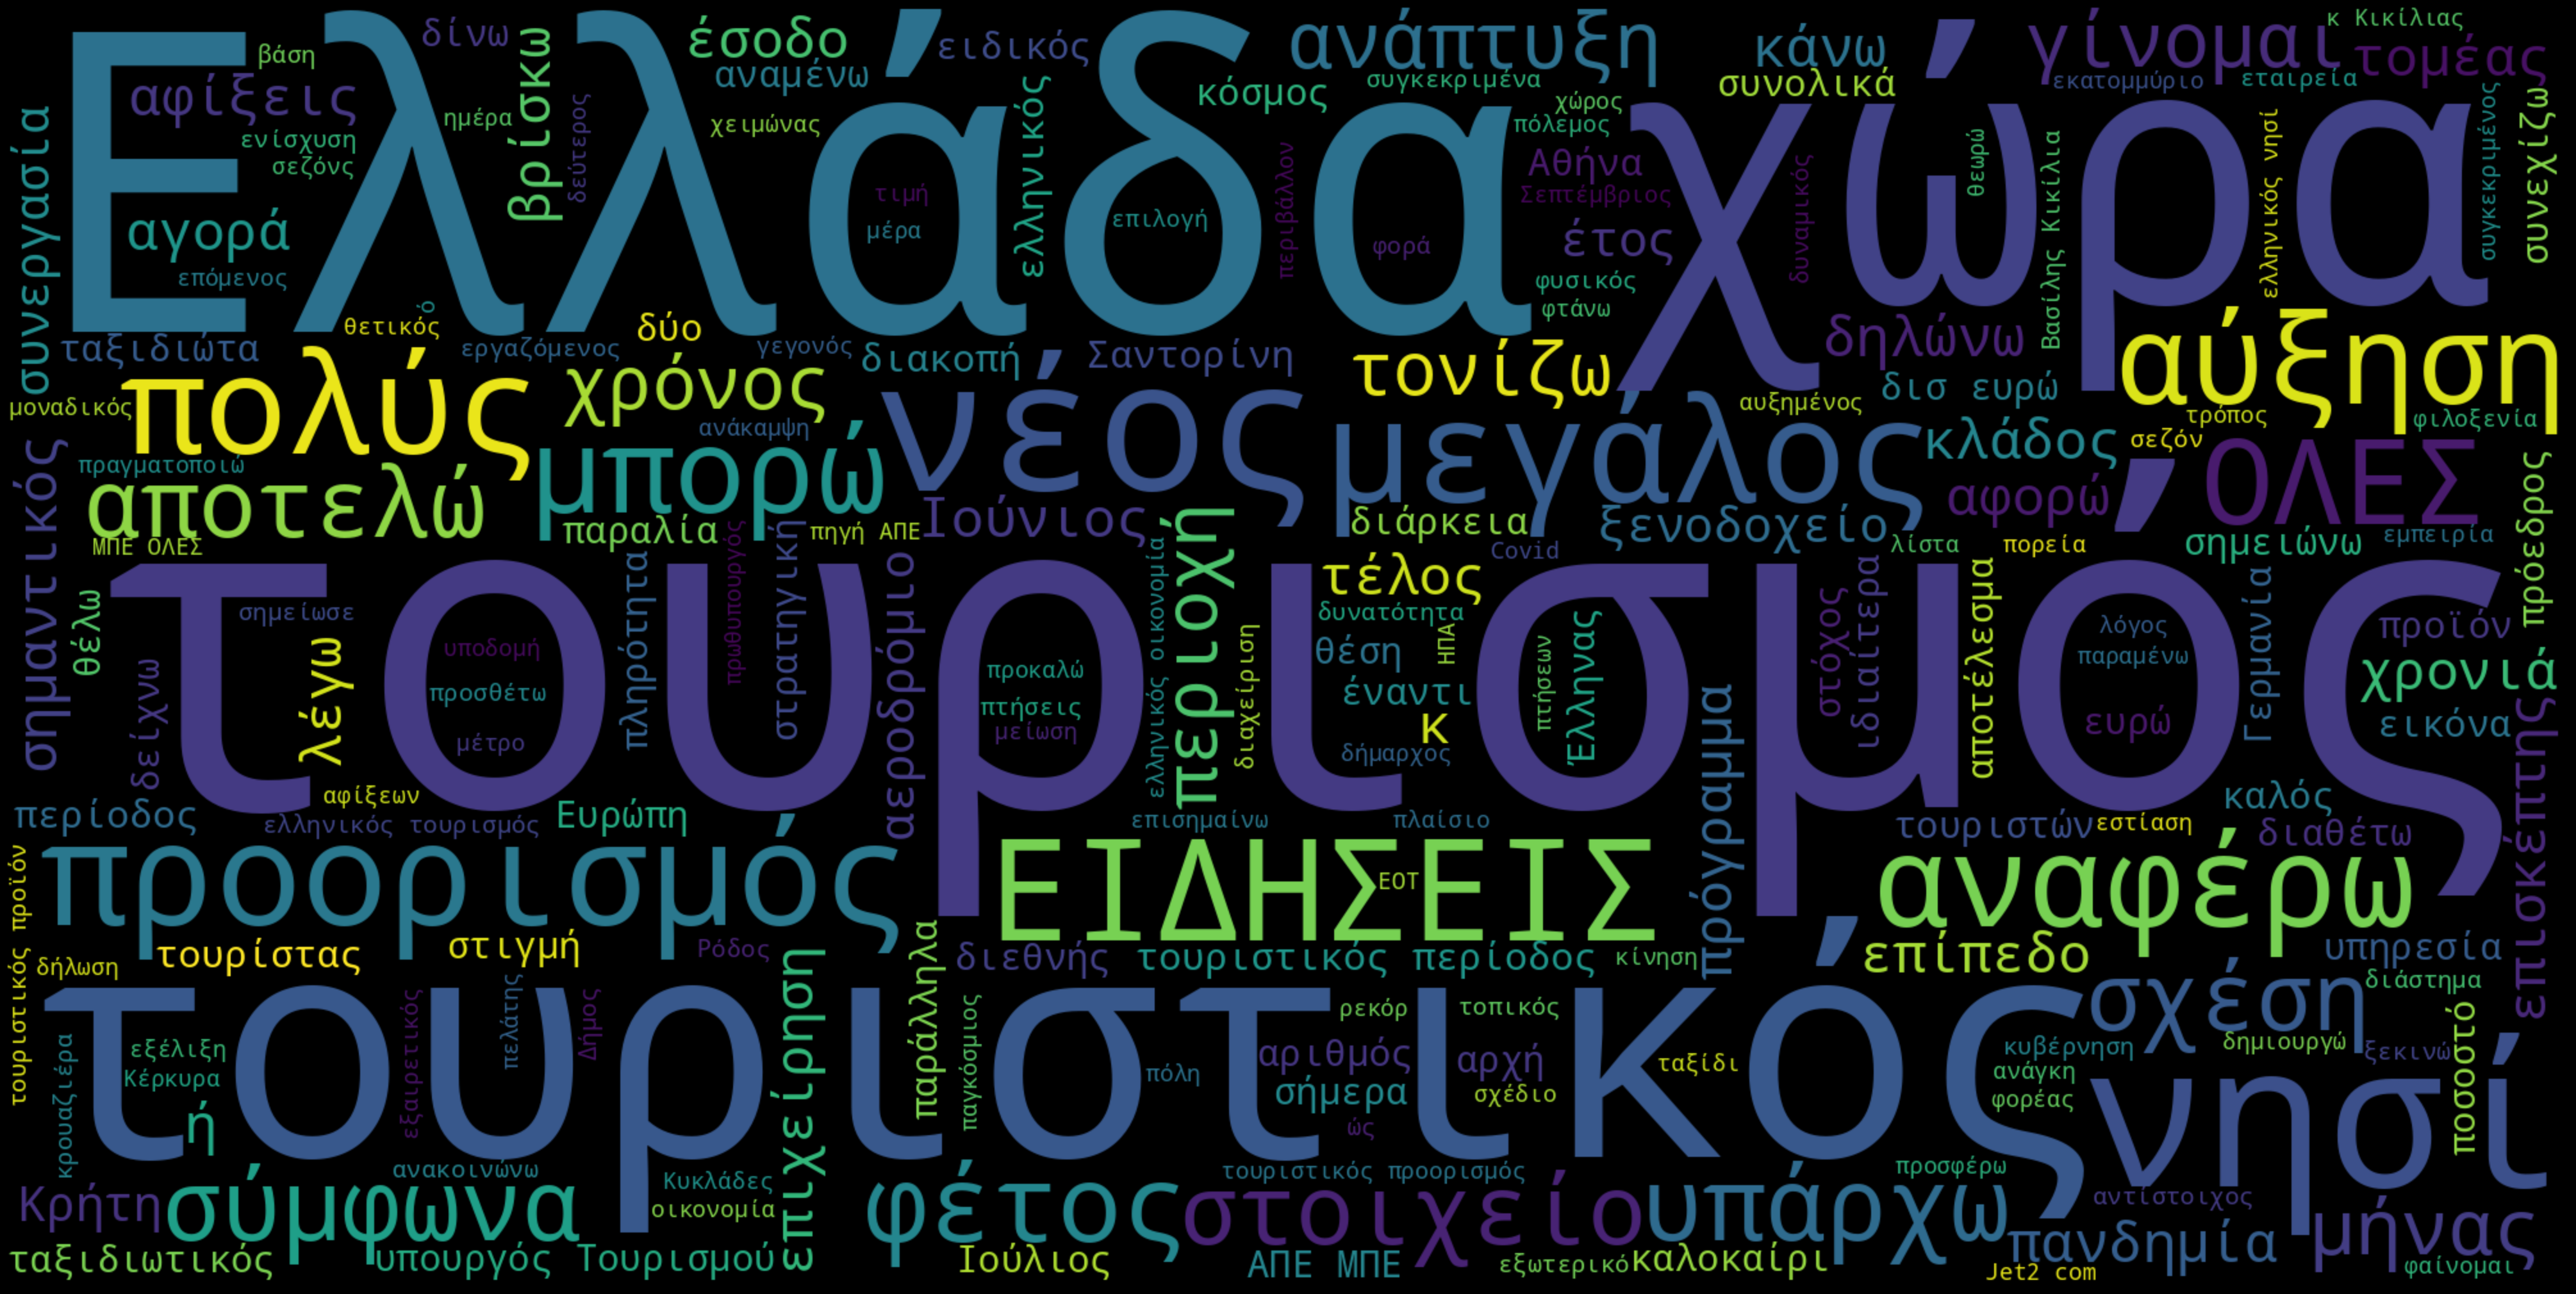

In [157]:
wordcloud2 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lemmatized_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [158]:
doc = nlp(newsit_short_df['full_text'][1])

In [159]:
for token in doc:
    print(token, token.lemma_)

« «
Με με
σκληρή σκληρός
δουλειά δουλειά
και και
μέσα μέσα
σε σε
μια ένας
πολύ πολύ
δύσκολη δύσκολος
χρονιά χρονιά
με με
πόλεμο πόλεμος
στην σε ο
καρδιά καρδιά
της ο
Ευρώπης Ευρώπη
, ,
ενεργειακή ενεργειακός
κρίση κρίση
και και
πληθωρισμό πληθωρισμός
η ο
Αθήνα Αθήνα
έκανε κάνω
δυναμικό δυναμικός
come come
back back
στον σε ο
τουρισμό τουρισμός
» »
τόνισε τονίζω
μεταξύ μεταξύ
άλλων άλλος
ο ο
Υπουργός υπουργός
Τουρισμού Τουρισμού
Βασίλης Βασίλης
Κικίλιας Κικίλιας
στην σε ο
εκπομπή εκπομπή
« «
Καλοκαίρι Καλοκαίρι
Μαζί μαζί
» »
του ο
ΑΝΤ1 ΑΝΤ1
, ,
με με
τους ο
δημοσιογράφους δημοσιογράφος
Γιώργο Γιώργος
Γρηγοριάδη Γρηγοριάδης
και και
Νίκο Νίκο
Ρογκάκο Ρογκάκο
, ,
δηλώνοντας δηλώνω
ότι ότι
τα ο
έσοδα έσοδο
από από
τον ο
τουρισμό τουρισμός
θα θα
είναι είμαι
πάνω πάνω
από από
τα ο
18,2 18,2
δις δις
του ο
2019 2019
. .
Ο ο
κ. κ.
Κικίλιας Κικίλιας
συνομίλησε συνομίλησε
με με
επιχειρηματίες επιχειρηματία
και και
εργαζόμενους εργαζόμενος
της ο
εστίασης εστίαση
στο σε ο
ιστορικό ιστορικός
κέντρο κ

In [160]:
' '.join(token.lemma_ for token in doc)

'« με σκληρός δουλειά και μέσα σε ένας πολύ δύσκολος χρονιά με πόλεμος σε ο καρδιά ο Ευρώπη , ενεργειακός κρίση και πληθωρισμός ο Αθήνα κάνω δυναμικός come back σε ο τουρισμός » τονίζω μεταξύ άλλος ο υπουργός Τουρισμού Βασίλης Κικίλιας σε ο εκπομπή « Καλοκαίρι μαζί » ο ΑΝΤ1 , με ο δημοσιογράφος Γιώργος Γρηγοριάδης και Νίκο Ρογκάκο , δηλώνω ότι ο έσοδο από ο τουρισμός θα είμαι πάνω από ο 18,2 δις ο 2019 . ο κ. Κικίλιας συνομίλησε με επιχειρηματία και εργαζόμενος ο εστίαση σε ο ιστορικός κέντρο ο πρωτεύουσας ο οποίος εκφράζω ο ικανοποίηση μου για ο μεγάλος αύξηση ο τζίρος από ο ισχυρός τουριστικός ρεύμα και παράλληλα εξέπεμψαν μήνυμα αισιοδοξία πως ο σεζόνς θα διαρκώ μέχρι ο τέλος ο 2022 .   « Βρισκόμαστε σε ο καρδιά ο εμπορικός ζωή ο Αθήνα και ο έσοδο από ο τουρισμός στηρίζω ο εργαζομένους σε ο τουρισμός , ο ελληνικός επιχείρηση , από ο καφέ , ο εστιατόριο , ο μίνι μάρκετς , μέχρι και ο φούρνο » σημείωσε ο κ. Κικίλιας υπογραμμίζω ότι « επεκτείναμε ο τουριστικός σεζόνς καθώς ξεκινώ νωρίς

In [161]:
text

'Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνει η αμερικανική πολυεθνική εταιρεία φιλοξενίας\xa0Hyatt\xa0με παρουσία σε όλον τον κόσμο. Το\xa0Magna\xa0Resort\xa0Santorini, υπό τη διαχείριση της SWOT Hospitality που άνοιξε στη Σαντορίνη, αποτελεί το πρώτο πολυτελές θέρετρο με το εμπορικό σήμα της Hyatt στα ελληνικά νησιά. H\xa0δε, σύνδεση του με τη συλλογή Unbound Collection by Hyatt, υπογραμμίζει τη στρατηγική στόχευση της Hyatt στην ανάπτυξη των ανεξάρτητων εμπορικών σημάτων της σε σημαντικούς, παγκόσμιους, δημοφιλείς προορισμούς.\xa0 \xa0To\xa0πολυτελές ξενοδοχείο\xa0Magna\xa0Resort\xa0Santorini\xa0διαθέτει 59 δωμάτια και βρίσκεται ανάμεσα στις κορυφές των λόφων του Βουρβούλου.   Όπως ανέφερε ο κ. Στέλιος Κουτσιβίτης, Πρόεδρος και ένας εκ των βασικών μετόχων της SWOT Hospitality, εταιρείας που διαχειρίζεται το Magma Resort Santorini: \xa0«Με ενθουσιασμό ανοίξαμε το Magma Resort Santorini, παρουσιάζοντας τη συλλογή Unbound Collection by Hyatt στους έμπειρους ταξιδιώτες που αναζητούν 

In [162]:
full_doc = nlp(text)

In [163]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [164]:
clear_text[200:400]

'ity που άνοιξε σε ο Σαντορίνη , αποτελώ ο πρώτος πολυτελός θέρετρο με ο εμπορικός σήμα ο Hyatt σε ο ελληνικός νησί . H \xa0 δε , σύνδεση μου με ο συλλογή Unbound Collection by Hyatt , υπογραμμίζω ο στρατ'

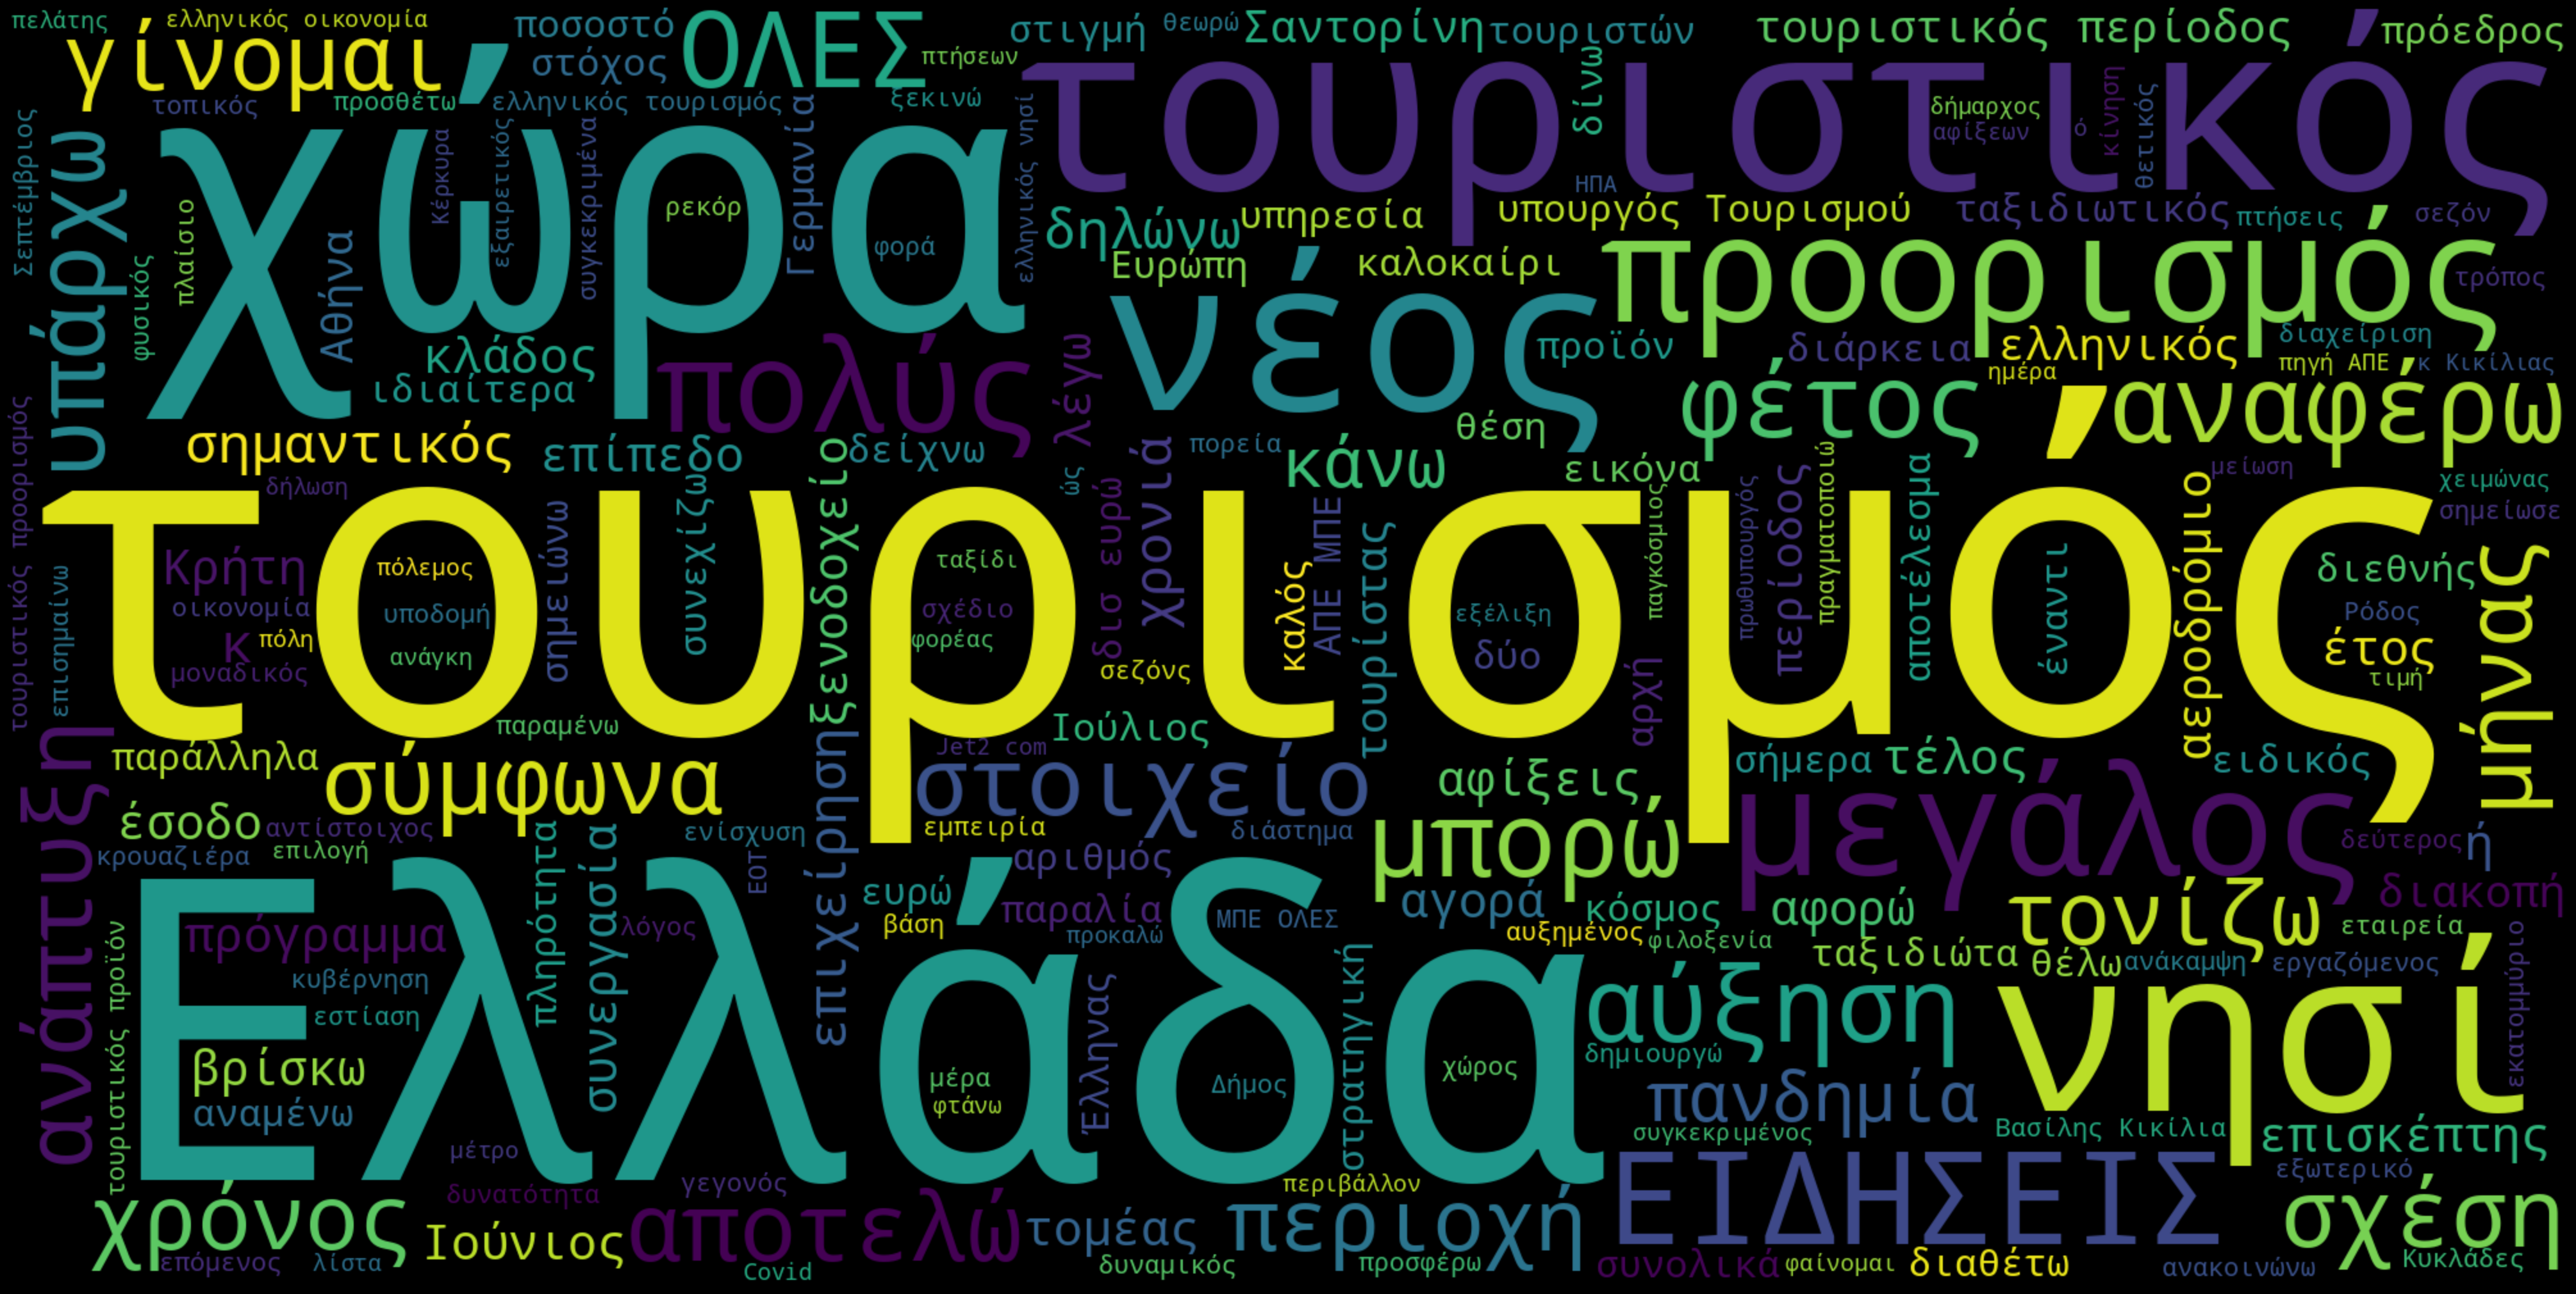

In [165]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
cv = CountVectorizer()

In [168]:
count_vector = cv.fit_transform(newsit_short_df['full_text'])

In [169]:
count_vector.shape

(120, 8401)

In [170]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  003  006  01  02  03  033  04  042  ...  ύμνους  ύπαιθρό  ύστερα  \
0   0    0    0    0   0   0   0    0   0    0  ...       0        0       0   
1   0    0    0    0   0   0   0    0   0    0  ...       0        0       0   
2   0    0    0    0   0   0   0    0   0    0  ...       0        0       0   
3   0    0    0    0   0   0   0    0   0    0  ...       0        0       0   
4   0    4    0    0   0   0   0    0   0    0  ...       0        0       0   

   ύψος  ύψους  ώθηση  ώρα  ώρες  ώριμα  ώστε  
0     0      0      0    0     0      0     0  
1     0      0      0    0     0      0     2  
2     0      0      0    0     0      0     0  
3     0      0      0    0     0      0     0  
4     0      0      0    0     0      0     0  

[5 rows x 8401 columns]

In [171]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [172]:
count_vector = cv.fit_transform(newsit_short_df['full_text'])

In [173]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  003  006  01  02  03  033  04  042  ...  ύδρα  ύδρευση  ύμνους  \
0   0    0    0    0   0   0   0    0   0    0  ...     0        0       0   
1   0    0    0    0   0   0   0    0   0    0  ...     0        0       0   
2   0    0    0    0   0   0   0    0   0    0  ...     0        0       0   
3   0    0    0    0   0   0   0    0   0    0  ...     0        0       0   
4   0    4    0    0   0   0   0    0   0    0  ...     0        0       0   

   ύπαιθρό  ύψος  ύψους  ώθηση  ώρα  ώρες  ώριμα  
0        0     0      0      0    0     0      0  
1        0     0      0      0    0     0      0  
2        0     0      0      0    0     0      0  
3        0     0      0      0    0     0      0  
4        0     0      0      0    0     0      0  

[5 rows x 8059 columns]

In [174]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [175]:
count_vector = cv.fit_transform(newsit_short_df['full_text'])

In [176]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

000  01  02  033  06  07  08  10  100  102  ...  όριο  όρο  όρος  όρους  \
0    0   0   0    0   0   0   0   0    0    0  ...     0    0     0      0   
1    0   0   0    0   0   0   0   0    0    0  ...     0    0     0      0   
2    0   0   0    0   0   0   0   0    0    0  ...     0    0     0      0   
3    0   0   0    0   0   0   0   0    0    0  ...     0    0     0      0   
4    4   0   0    0   0   0   0   1    0    0  ...     0    1     1      0   

   όρων  ύψους  ώθηση  ώρα  ώρες  ώριμα  
0     0      0      0    0     0      0  
1     0      0      0    0     0      0  
2     0      0      0    0     0      0  
3     0      0      0    0     0      0  
4     0      0      0    0     0      0  

[5 rows x 3145 columns]

In [177]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(newsit_short_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

2019  2021  2022  αύξηση  ειδησεις  ελλάδα  ευρώ  κικίλιας  νησί  νησιά  \
0     0     0     0       0         1       0     0         0     0      1   
1     2     0     1       2         1       1     0         3     0      0   
2     1     0     0       1         1       1     0         0     3      1   
3     0     0     0       0         1       0     0         0     0      0   
4     6     1     1       7         1       0     3         0     0      0   

   ολες  προορισμούς  σύμφωνα  τουρισμού  τουρισμό  τουρισμός  τουριστική  \
0     1            1        0          0         1          0           0   
1     1            0        0          1         4          0           1   
2     1            2        2          1         1          0           1   
3     1            0        0          0         1          0           0   
4     1            0        1          2         0          0           0   

   τουριστικής  φέτος  χώρα  
0            0      0     0  
1            0      1     1  
2            0      0     0  
3            0      0     0  
4            0      6     0

In [178]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(newsit_short_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κυβέρνησή  κυβέρνηση  κυβέρνησης  κυβερνήσεις  κυβερνήσεως  κυβερνητικές  \
0          0          0           0            0            0             0   
1          0          0           0            0            0             0   
2          0          0           0            0            0             0   
3          0          0           0            0            0             0   
4          0          0           0            0            0             0   

   κυβερνητικό  
0            0  
1            0  
2            0  
3            0  
4            0

In [179]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(newsit_short_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

jet2 com  απε μπε  βασίλης κικίλιας  δισ ευρώ  δύο χρόνια  εκατ ευρώ  \
0         0        0                 0         0           0          0   
1         0        0                 1         0           0          0   
2         0        0                 0         0           0          0   
3         0        0                 0         0           0          0   
4         0        0                 0         0           0          0   

   ελληνικά νησιά  επίπεδα 2019  ηνωμένο βασίλειο  κυριάκος μητσοτάκης  \
0               1             0                 0                    0   
1               0             0                 0                    0   
2               0             0                 0                    0   
3               0             0                 0                    0   
4               0             0                 1                    0   

   μπε ολες  νοτίου αιγαίου  ολες ειδησεις  πηγή απε  σχέση 2019  \
0         0               0              1         0           0   
1         0               0              1         0           0   
2         0               0              1         0           1   
3         0               0              1         0           0   
4         0               0              1         0           3   

   τουρισμού βασίλης  τουριστικής περιόδου  τουριστικό προϊόν  \
0                  0                     0                  0   
1                  1                     0                  0   
2                  0                     0                  0   
3                  0                     0                  0   
4                  0                     0                  0   

   υπουργείου τουρισμού  υπουργός τουρισμού  
0                     0                   0  
1                     0                   1  
2                     0                   0  
3                     0                   0  
4                     0                   0

In [180]:
results.sum(axis =0).sort_values(ascending = False)

ολες ειδησεις           119
υπουργός τουρισμού       47
δισ ευρώ                 41
βασίλης κικίλιας         39
απε μπε                  35
τουριστικής περιόδου     27
τουρισμού βασίλης        23
μπε ολες                 23
jet2 com                 21
νοτίου αιγαίου           20
πηγή απε                 20
υπουργείου τουρισμού     18
ηνωμένο βασίλειο         17
ελληνικά νησιά           17
δύο χρόνια               17
σχέση 2019               16
κυριάκος μητσοτάκης      15
επίπεδα 2019             15
εκατ ευρώ                15
τουριστικό προϊόν        15
dtype: int64

In [181]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

ολες ειδησεις         119
υπουργός τουρισμού     47
δισ ευρώ               41
βασίλης κικίλιας       39
απε μπε                35
dtype: int64

In [182]:
newsit_short_df['full_text']

0      Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...
1      «Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ...
2      Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και...
3      Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο...
4      Αλλαγές στο προφίλ των τουριστών που επισκέπτο...
                             ...                        
115    Αισιόδοξη πρόβλεψη από την EBRD (Ευρωπαϊκή Τρά...
116    Με σκληρή δουλειά τώρα, αναμένουμε την ολική ε...
117    Ως ο κορυφαίος προορισμός για την Ευρώπη το 20...
118    Το νησί του Πάσχα θα παραμείνει κλειστό προς τ...
119    Αύξηση προσέλευσης της τάξεως του 79,3% σε σχέ...
Name: full_text, Length: 120, dtype: object

In [183]:
contain_values = newsit_short_df[newsit_short_df['full_text'].str.contains('Άνδρος|Μύκονος|Σάμος|Σαντορίνη')]
print (contain_values)

                     datetime  \
0   2022-08-31 11:26:54+00:00   
11  2022-07-31 06:54:40+00:00   
12  2022-07-31 06:35:23+00:00   
17  2022-07-17 13:35:00+00:00   
23  2022-07-10 15:20:41+00:00   
30  2022-07-04 09:56:38+00:00   
33  2022-07-01 08:09:21+00:00   
44  2022-06-17 08:54:17+00:00   
49  2022-06-05 10:45:18+00:00   
50  2022-06-03 07:16:04+00:00   
51  2022-06-02 11:54:11+00:00   
54  2022-05-30 13:11:52+00:00   
57  2022-05-23 08:19:28+00:00   
58  2022-05-18 13:35:03+00:00   
59  2022-05-18 09:46:13+00:00   
60  2022-05-17 07:11:03+00:00   
65  2022-05-04 18:07:40+00:00   
66  2022-05-03 10:44:05+00:00   
69  2022-04-20 06:28:26+00:00   
75  2022-03-29 20:43:43+00:00   
76  2022-03-29 15:11:50+00:00   
78  2022-03-18 16:29:20+00:00   
80  2022-03-04 11:55:44+00:00   
83  2022-02-28 11:52:16+00:00   
84  2022-02-22 07:12:00+00:00   
87  2022-02-21 10:28:03+00:00   
91  2022-02-05 07:05:08+00:00   
101 2022-01-13 08:19:06+00:00   
111 2021-11-26 08:52:17+00:00   

         

In [232]:
len(contain_values)

29

In [184]:
cv = CountVectorizer( stop_words=['Σάμος', 'Μύκονος', 'Άνδρος', 'Σαντορίνη'], max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(newsit_short_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['άνδρος', 'μύκονος', 'σάμος', 'σαντορίνη'] not in stop_words.
  warnings.warn(


αλλά και  από την  από τις  από το  για την  για το  για τον  και οι  \
0         0        0        0       0        0       0        0       0   
1         0        0        0       2        1       0        0       0   
2         0        0        0       0        0       0        1       0   
3         0        2        0       2        3       0        0       0   
4         5        2        1       0        2       1        0       0   

   και την  και το  με την  με το  με τον  οι ειδησεις  ολες οι  στην ελλάδα  \
0        0       0       0      1       0            1        1            0   
1        0       1       0      1       0            1        1            1   
2        1       1       1      2       2            1        1            0   
3        0       0       0      0       0            1        1            0   
4        1       1       3      4       0            1        1            0   

   σχέση με  σύμφωνα με  του 2019  του τουρισμού  
0         0           0         0              0  
1         1           0         2              0  
2         1           2         0              0  
3         0           0         0              0  
4         6           1         1              1

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [186]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(newsit_short_df['full_text'])

In [187]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

000        10  100   11        12   13   14        15        18   19  \
0  0.00000  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0   
1  0.00000  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.139366  0.0   
2  0.00000  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0   
3  0.00000  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  0.0   
4  0.11495  0.032718  0.0  0.0  0.036313  0.0  0.0  0.111083  0.000000  0.0   

   ...    χρόνια  χρόνο  χρόνου  χωρών      χώρα  χώρας     χώρες  χώρο  \
0  ...  0.000000    0.0     0.0    0.0  0.000000    0.0  0.000000   0.0   
1  ...  0.000000    0.0     0.0    0.0  0.072173    0.0  0.000000   0.0   
2  ...  0.071582    0.0     0.0    0.0  0.000000    0.0  0.000000   0.0   
3  ...  0.000000    0.0     0.0    0.0  0.000000    0.0  0.000000   0.0   
4  ...  0.000000    0.0     0.0    0.0  0.000000    0.0  0.031246   0.0   

    χώρους  ψηφιακή  
0  0.00000      0.0  
1  0.00000      0.0  
2  0.00000      0.0  
3  0.00000      0.0  
4  0.04366      0.0  

[5 rows x 500 columns]

In [188]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements


cosine scores ==>  [[1.         0.05289983 0.07896893 0.22074229 0.03198053 0.19347456
  0.09007755 0.16304768 0.041571   0.08040437 0.10226646 0.124218
  0.12199246 0.05955797 0.08335976 0.02402596 0.05368177 0.16179729
  0.04242028 0.00259778 0.00431529 0.09694952 0.05907369 0.00925041
  0.08014005 0.00902867 0.07897232 0.12398027 0.05266979 0.00887236
  0.14145726 0.09882239 0.08242338 0.08168667 0.15485794 0.02092463
  0.04134216 0.00501081 0.17589752 0.09554549 0.00961815 0.01402219
  0.15153613 0.08244984 0.09043643 0.14190874 0.00261299 0.09847737
  0.0523092  0.04312544 0.05282474 0.19204654 0.05560902 0.07755074
  0.10620666 0.16450639 0.05963059 0.06170232 0.09957987 0.1015854
  0.03904784 0.12679223 0.02770688 0.11616002 0.09758034 0.15085141
  0.12312041 0.09002603 0.02830072 0.11395122 0.00418144 0.1789696
  0.07448281 0.04535004 0.01630146 0.10224417 0.11686171 0.0927589
  0.03450673 0.10559438 0.24577035 0.01141208 0.04275987 0.08271338
  0.09240956 0.18196697 0.00463136

In [189]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

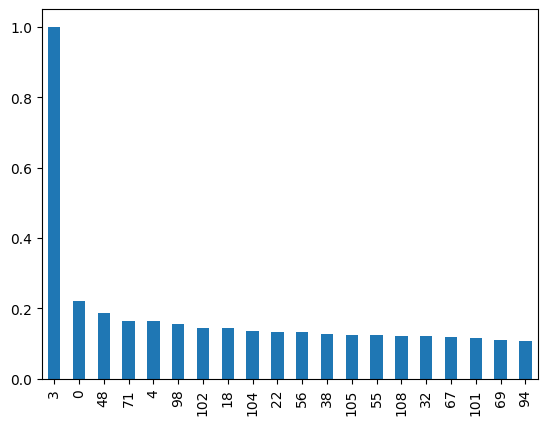

In [190]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [191]:
newsit_short_df['full_text'].loc[3]

'Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικογένεια Τσατσαρωνάκη, ιδιοκτήτες της κρητικής αρτοποιίας, ευρέως γνωστή για τα παξιμάδια «Το Μάννα», καθώς έχει δρομολογήσει μία μεγάλη επένδυση που θα αναπτυχθεί σε έκταση περίπου 119 στρεμμάτων, κατά μήκος του μεγαλύτερου τμήματος της παραλίας Φαλάσαρνας στην Κίσσαμο Χανίων, στην Κρήτη. Περί τα τέλη Ιουλίου, η Στρατηγική Μελέτη Περιβαλλοντικών Επιπτώσεων (Σ.Μ.Π.Ε.) του Ειδικού Πολεοδομικού Σχεδίου (Ε.Π.Σ.) για την περιοχή που θα γίνει το project τέθηκε σε δημόσια διαβούλευση από το Υπουργείο Περιβάλλοντος και Ενέργειας, που σημαίνει ότι το έργο βρίσκεται σε αρχικό ακόμα στάδιο.  Το τουριστικό συγκρότημα θα κατασκευαστεί από την ΑΤΕΦΑ ΑΕ και προβλέπει την ανάπτυξη κτηρίου υποδομής, εστιατόριο με κρητικές γεύσεις, ενοικιαζόμενα δωμάτια, κατοικίες διαφόρων μεγεθών, πισίνες,\xa0beach\xa0bar, παραδοσιακό φούρνο, καταστήματα λιανεμπορίου, θέατρο μουσείο κι άλλες εγκαταστάσεις αναψυχής, καθώς κι ένα οινοποιείο.\xa0 Όπως αναφέρεται στο σχέδιο που

In [192]:
newsit_short_df['full_text'].loc[0]

'Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνει η αμερικανική πολυεθνική εταιρεία φιλοξενίας\xa0Hyatt\xa0με παρουσία σε όλον τον κόσμο. Το\xa0Magna\xa0Resort\xa0Santorini, υπό τη διαχείριση της SWOT Hospitality που άνοιξε στη Σαντορίνη, αποτελεί το πρώτο πολυτελές θέρετρο με το εμπορικό σήμα της Hyatt στα ελληνικά νησιά. H\xa0δε, σύνδεση του με τη συλλογή Unbound Collection by Hyatt, υπογραμμίζει τη στρατηγική στόχευση της Hyatt στην ανάπτυξη των ανεξάρτητων εμπορικών σημάτων της σε σημαντικούς, παγκόσμιους, δημοφιλείς προορισμούς.\xa0 \xa0To\xa0πολυτελές ξενοδοχείο\xa0Magna\xa0Resort\xa0Santorini\xa0διαθέτει 59 δωμάτια και βρίσκεται ανάμεσα στις κορυφές των λόφων του Βουρβούλου.   Όπως ανέφερε ο κ. Στέλιος Κουτσιβίτης, Πρόεδρος και ένας εκ των βασικών μετόχων της SWOT Hospitality, εταιρείας που διαχειρίζεται το Magma Resort Santorini: \xa0«Με ενθουσιασμό ανοίξαμε το Magma Resort Santorini, παρουσιάζοντας τη συλλογή Unbound Collection by Hyatt στους έμπειρους ταξιδιώτες που αναζητούν 

In [193]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

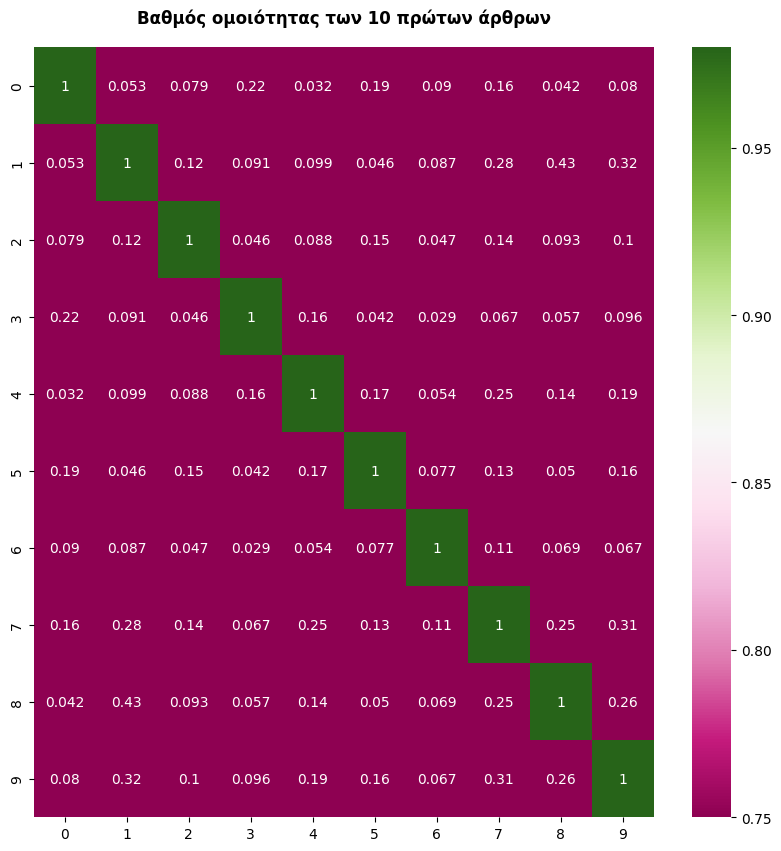

In [194]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")


In [195]:
#!python -m spacy download el_core_news_sm

In [196]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [197]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [198]:

filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [199]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [200]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [201]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [202]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [203]:
!python -m spacy download el_core_news_sm

2023-07-14 18:06:11.197923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 55.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [204]:
nlp = spacy.load('el_core_news_sm')


In [205]:
len(newsit_full_articles_df)

120

In [206]:
newsit_short_df = newsit_full_articles_df[['date','full_text' ]]
newsit_short_df = newsit_short_df.rename(columns={'full_text': 'text'} )

In [207]:
newsit_short_df.head()

date  \
0  2022-08-31T14:26:54+03:00   
1  2022-08-31T11:48:30+03:00   
2  2022-08-29T11:23:39+03:00   
3  2022-08-26T15:30:00+03:00   
4  2022-08-26T11:34:08+03:00   

                                                text  
0  Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...  
1  «Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ...  
2  Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και...  
3  Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο...  
4  Αλλαγές στο προφίλ των τουριστών που επισκέπτο...

In [208]:
emolex_df['word'].head(5)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
Name: word, dtype: object

In [209]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [210]:
matrix = vec.fit_transform(newsit_short_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [211]:
wordcount_df.shape

(120, 13161)

In [212]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [213]:
wordcount_df[joy_words].sum(axis=1)

0      1
1      0
2      1
3      0
4      7
      ..
115    2
116    1
117    4
118    2
119    0
Length: 120, dtype: int64

In [214]:
cnt = 0
for i in wordcount_df[joy_words].sum(axis=1):
  cnt+=i
print(cnt)

359


In [215]:
newsit_short_df['anger'] = wordcount_df[angry_words].sum(axis=1)

newsit_short_df['positive'] = wordcount_df[positive_words].sum(axis=1)

newsit_short_df['joy'] = wordcount_df[joy_words].sum(axis=1)

newsit_short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

newsit_short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

newsit_short_df['trust'] = wordcount_df[trust_words].sum(axis=1)

newsit_short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

newsit_short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

newsit_short_df['negative'] = wordcount_df[negative_words].sum(axis=1)

newsit_short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [216]:
newsit_short_df

date  \
0    2022-08-31T14:26:54+03:00   
1    2022-08-31T11:48:30+03:00   
2    2022-08-29T11:23:39+03:00   
3    2022-08-26T15:30:00+03:00   
4    2022-08-26T11:34:08+03:00   
..                         ...   
115  2021-11-04T13:21:57+02:00   
116  2021-11-03T18:41:53+02:00   
117  2021-10-25T11:30:00+03:00   
118  2021-10-25T09:35:26+03:00   
119  2021-10-22T15:29:13+03:00   

                                                  text  anger  positive  joy  \
0    Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...      0         8    1   
1    «Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ...      4         4    0   
2    Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και...      2         8    1   
3    Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο...      1         7    0   
4    Αλλαγές στο προφίλ των τουριστών που επισκέπτο...      4        26    7   
..                                                 ...    ...       ...  ...   
115  Αισιόδοξη πρόβλεψη από την EBRD (Ευρωπαϊκή Τρά...      2        15    2   
116  Με σκληρή δουλειά τώρα, αναμένουμε την ολική ε...      1         5    1   
117  Ως ο κορυφαίος προορισμός για την Ευρώπη το 20...      0         6    4   
118  Το νησί του Πάσχα θα παραμείνει κλειστό προς τ...      1         4    2   
119  Αύξηση προσέλευσης της τάξεως του 79,3% σε σχέ...      0         1    0   

     disgust  surprise  trust  anticipation  sadness  negative  fear  
0          0         0      4             2        0         0     0  
1          0         1      5             2        2         7     2  
2          2         0      5             1        3         2     3  
3          1         0      1             3        0         3     3  
4          5         2     16            11        8        12     6  
..       ...       ...    ...           ...      ...       ...   ...  
115        0         1     14             5        1         8     3  
116        1         1      5             4        2         7     5  
117        1         3      4             3        2         1     2  
118        4         2      5             3        0         2     1  
119        0         0      1             0        0         0     0  

[120 rows x 12 columns]

In [217]:
newsit_short_df.reset_index(inplace=True)
newsit_short_df.set_index('date', inplace=True)
newsit_short_df

index  \
date                               
2022-08-31T14:26:54+03:00      0   
2022-08-31T11:48:30+03:00      1   
2022-08-29T11:23:39+03:00      2   
2022-08-26T15:30:00+03:00      3   
2022-08-26T11:34:08+03:00      4   
...                          ...   
2021-11-04T13:21:57+02:00    115   
2021-11-03T18:41:53+02:00    116   
2021-10-25T11:30:00+03:00    117   
2021-10-25T09:35:26+03:00    118   
2021-10-22T15:29:13+03:00    119   

                                                                        text  \
date                                                                           
2022-08-31T14:26:54+03:00  Ψήφο εμπιστοσύνης στον ελληνικό τουρισμό ρίχνε...   
2022-08-31T11:48:30+03:00  «Με σκληρή δουλειά και μέσα σε μια πολύ δύσκολ...   
2022-08-29T11:23:39+03:00  Μία νέα διεθνή διάκριση απέσπασαν η Ελλάδα και...   
2022-08-26T15:30:00+03:00  Ένα μεγάλο βήμα προς τον τουρισμό κάνει η οικο...   
2022-08-26T11:34:08+03:00  Αλλαγές στο προφίλ των τουριστών που επισκέπτο...   
...                                                                      ...   
2021-11-04T13:21:57+02:00  Αισιόδοξη πρόβλεψη από την EBRD (Ευρωπαϊκή Τρά...   
2021-11-03T18:41:53+02:00  Με σκληρή δουλειά τώρα, αναμένουμε την ολική ε...   
2021-10-25T11:30:00+03:00  Ως ο κορυφαίος προορισμός για την Ευρώπη το 20...   
2021-10-25T09:35:26+03:00  Το νησί του Πάσχα θα παραμείνει κλειστό προς τ...   
2021-10-22T15:29:13+03:00  Αύξηση προσέλευσης της τάξεως του 79,3% σε σχέ...   

                           anger  positive  joy  disgust  surprise  trust  \
date                                                                        
2022-08-31T14:26:54+03:00      0         8    1        0         0      4   
2022-08-31T11:48:30+03:00      4         4    0        0         1      5   
2022-08-29T11:23:39+03:00      2         8    1        2         0      5   
2022-08-26T15:30:00+03:00      1         7    0        1         0      1   
2022-08-26T11:34:08+03:00      4        26    7        5         2     16   
...                          ...       ...  ...      ...       ...    ...   
2021-11-04T13:21:57+02:00      2        15    2        0         1     14   
2021-11-03T18:41:53+02:00      1         5    1        1         1      5   
2021-10-25T11:30:00+03:00      0         6    4        1         3      4   
2021-10-25T09:35:26+03:00      1         4    2        4         2      5   
2021-10-22T15:29:13+03:00      0         1    0        0         0      1   

                           anticipation  sadness  negative  fear  
date                                                              
2022-08-31T14:26:54+03:00             2        0         0     0  
2022-08-31T11:48:30+03:00             2        2         7     2  
2022-08-29T11:23:39+03:00             1        3         2     3  
2022-08-26T15:30:00+03:00             3        0         3     3  
2022-08-26T11:34:08+03:00            11        8        12     6  
...                                 ...      ...       ...   ...  
2021-11-04T13:21:57+02:00             5        1         8     3  
2021-11-03T18:41:53+02:00             4        2         7     5  
2021-10-25T11:30:00+03:00             3        2         1     2  
2021-10-25T09:35:26+03:00             3        0         2     1  
2021-10-22T15:29:13+03:00             0        0         0     0  

[120 rows x 12 columns]

In [218]:
newsit_short_df.index

Index(['2022-08-31T14:26:54+03:00', '2022-08-31T11:48:30+03:00',
       '2022-08-29T11:23:39+03:00', '2022-08-26T15:30:00+03:00',
       '2022-08-26T11:34:08+03:00', '2022-08-25T18:39:39+03:00',
       '2022-08-23T13:36:00+03:00', '2022-08-20T12:39:31+03:00',
       '2022-08-17T06:21:00+03:00', '2022-08-02T11:46:32+03:00',
       ...
       '2021-11-29T14:10:15+02:00', '2021-11-26T10:52:17+02:00',
       '2021-11-23T07:24:39+02:00', '2021-11-22T09:05:08+02:00',
       '2021-11-12T17:19:09+02:00', '2021-11-04T13:21:57+02:00',
       '2021-11-03T18:41:53+02:00', '2021-10-25T11:30:00+03:00',
       '2021-10-25T09:35:26+03:00', '2021-10-22T15:29:13+03:00'],
      dtype='object', name='date', length=120)

παιρνουμε τη μαλακια το στρινγκ οππυ εχουμε για ντειτ το μετατρεπουμε σε στρινγκ το οποιο μπορει να γινει ντειταιμ της μορφης '
%Y-%m-%d %H:%M'

In [219]:
ac_date =[]
for i in newsit_short_df.index:
  x = i.replace('T'," ")
  x = x[:19]
  ac_date.append(x)
newsit_short_df.index = ac_date

newsit_short_df.index

Index(['2022-08-31 14:26:54', '2022-08-31 11:48:30', '2022-08-29 11:23:39',
       '2022-08-26 15:30:00', '2022-08-26 11:34:08', '2022-08-25 18:39:39',
       '2022-08-23 13:36:00', '2022-08-20 12:39:31', '2022-08-17 06:21:00',
       '2022-08-02 11:46:32',
       ...
       '2021-11-29 14:10:15', '2021-11-26 10:52:17', '2021-11-23 07:24:39',
       '2021-11-22 09:05:08', '2021-11-12 17:19:09', '2021-11-04 13:21:57',
       '2021-11-03 18:41:53', '2021-10-25 11:30:00', '2021-10-25 09:35:26',
       '2021-10-22 15:29:13'],
      dtype='object', length=120)

In [220]:
newsit_short_df.index = pd.to_datetime(newsit_short_df.index, format='%Y-%m-%d %H:%M')

<Axes: >

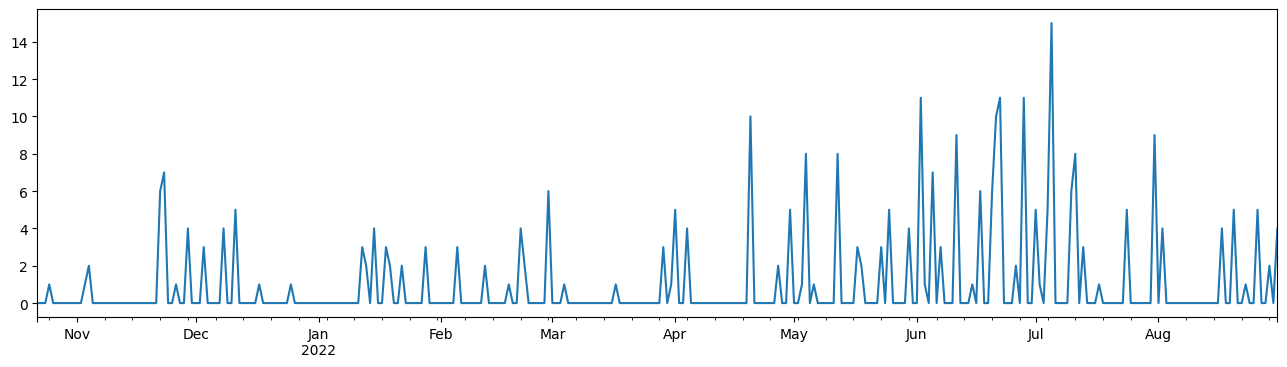

In [221]:
newsit_short_df['anger'].resample('D').sum().plot(figsize=(16,4))

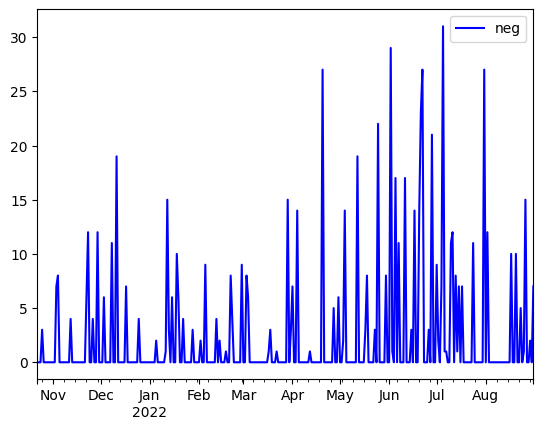

In [222]:
newsit_short_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

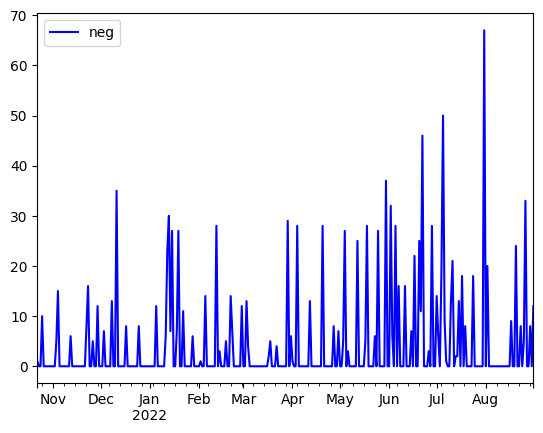

In [223]:
newsit_short_df['positive'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: >

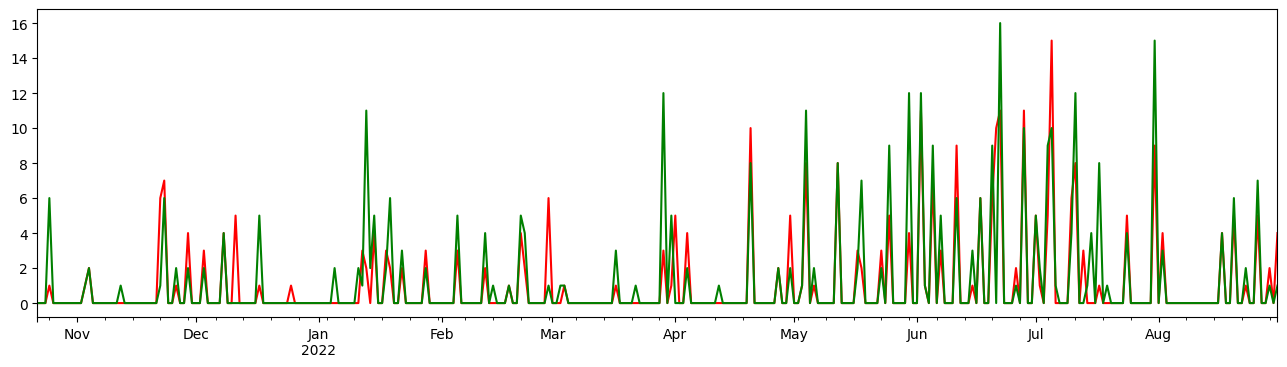

In [224]:
ax = newsit_short_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
newsit_short_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: >

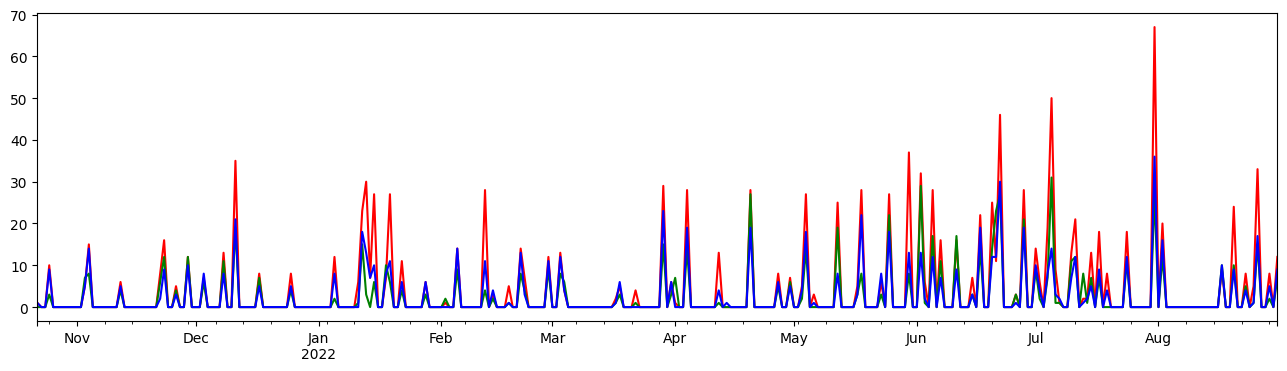

In [225]:
ax = newsit_short_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
newsit_short_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
newsit_short_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [226]:
import matplotlib.pyplot as plt
plt.style.use('default')

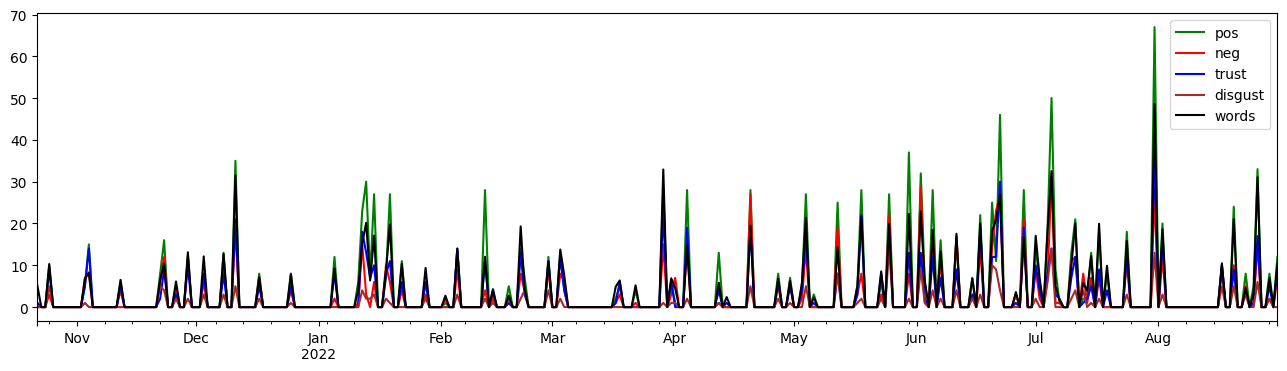

In [227]:
ax = newsit_short_df['positive'].resample('D').sum().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
newsit_short_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
newsit_short_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
newsit_short_df['disgust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(newsit_short_df['text'].str.len().resample('D').sum()/300).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: >

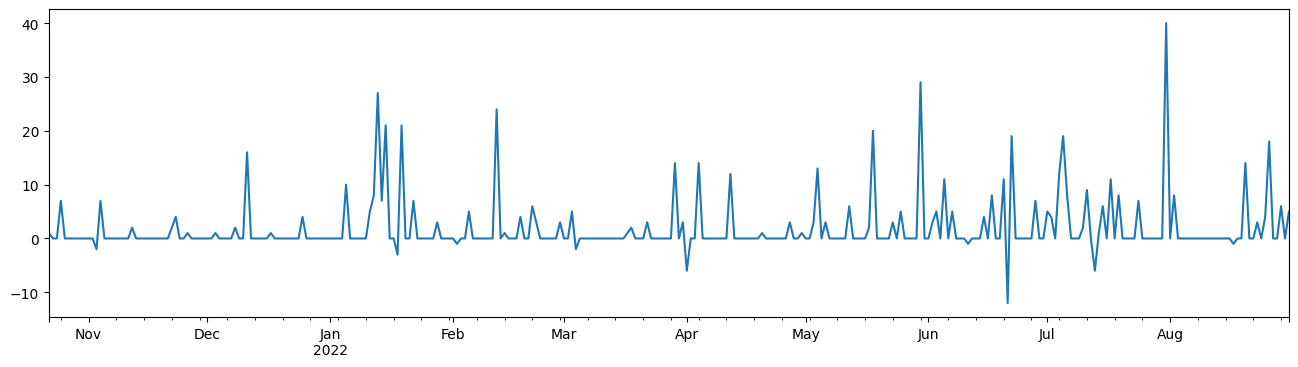

In [228]:
newsit_short_df['pos/neg'] = newsit_short_df['positive'] - newsit_short_df['negative']
newsit_short_df['pos/neg'].resample('D').sum().plot(figsize=(16,4))

In [229]:
newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'] = newsit_short_df.positive*100//newsit_short_df[['positive','negative']].sum(
        axis=1) - newsit_short_df.negative*100//newsit_short_df[['positive','negative']].sum(axis=1)
newsit_short_df[(newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'] == newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'] == newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive  negative  \
2022-08-31 14:26:54      0         8         0   
2022-07-19 11:42:53     15         8         0   
2022-07-01 11:09:21     33         1         7   
2022-05-30 15:30:22     55        14         0   
2022-05-06 08:35:01     63         3         0   
2022-04-01 17:52:50     73         1         7   
2022-01-14 15:41:10     99         7         0   
2021-10-22 15:29:13    119         1         0   

                     (-)αρνητικότητα | θετικότητα(+)  
2022-08-31 14:26:54                            100.0  
2022-07-19 11:42:53                            100.0  
2022-07-01 11:09:21                            -75.0  
2022-05-30 15:30:22                            100.0  
2022-05-06 08:35:01                            100.0  
2022-04-01 17:52:50                            -75.0  
2022-01-14 15:41:10                            100.0  
2021-10-22 15:29:13                            100.0

In [230]:
newsit_short_df['(+)εμπιστοσύνη | αποστροφή(-)'] = newsit_short_df.positive*100//newsit_short_df[['trust','disgust']].sum(
        axis=1) - newsit_short_df.negative*100//newsit_short_df[['trust','disgust']].sum(axis=1)

<Axes: >

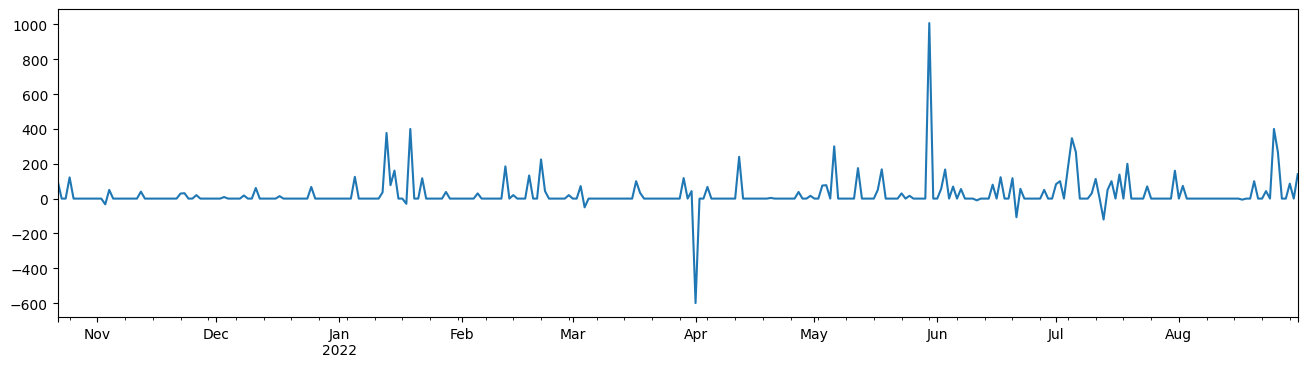

In [231]:
newsit_short_df['(+)εμπιστοσύνη | αποστροφή(-)'].resample('D').sum().plot(figsize=(16,4))